In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simulbench/saiga_llama3_answers.csv
/kaggle/input/simulbench/rusimulbench-2-generation.ipynb
/kaggle/input/simulbench/tinyllama_answers.csv
/kaggle/input/simulbench/evaluated_responses_saiga_llama3_answers (1).csv
/kaggle/input/simulbench/qwen_answers.csv
/kaggle/input/simulbench/evaluated_responses_vikhr_nemo.csv
/kaggle/input/simulbench/mistral_answers.csv
/kaggle/input/simulbench/evaluated_responses_mistral (1).csv
/kaggle/input/simulbench/evaluated_responses_qwen (1).csv
/kaggle/input/simulbench/simulbench_tasks.jsonl
/kaggle/input/simulbench/prompts.csv
/kaggle/input/simulbench/vikhr_nemo_answers.csv
/kaggle/input/simulbench/evaluated_responses_tinyllama.csv
/kaggle/input/simulbench/rusimulbench_all_prompts.csv


In [2]:
df_mistral = pd.read_csv('/kaggle/input/simulbench/evaluated_responses_mistral (1).csv')
df_qwen =  pd.read_csv('/kaggle/input/simulbench/evaluated_responses_qwen (1).csv')
df_llama3 =  pd.read_csv('/kaggle/input/simulbench/evaluated_responses_saiga_llama3_answers (1).csv')
df_tinyllama =  pd.read_csv('/kaggle/input/simulbench/evaluated_responses_tinyllama.csv')
df_vikhr =  pd.read_csv('/kaggle/input/simulbench/evaluated_responses_vikhr_nemo.csv')

In [3]:
df_mistral.columns

Index(['act', 'en_prompt', 'rus_prompt', 'mistral_answers',
       'gemini_eval_answer', 'Креативность', 'Разнообразие', 'Релевантность',
       'Среднее'],
      dtype='object')

In [4]:
df_qwen.head()

,act,en_prompt,rus_prompt,qwen_answers,gemini_eval_answer,Креативность,Разнообразие,Релевантность,Среднее
0,Password Generator,I want you to act as a password generator for ...,"Я хочу, чтобы вы выступили в роли генератора п...","Я хочу, чтобы вы выступили в роли генератора п...",Креативность: 0\nРазнообразие: 0\nРелевантност...,0.0,0.0,0.0,0.000000
1,Journalist,I want you to act as a journalist. You will re...,"Я хочу, чтобы вы выступили в роли журналиста. ...","Я хочу, чтобы вы выступили в роли журналиста. ...",Креативность: 10\nРазнообразие: 20\nРелеваннос...,10.0,20.0,90.0,40.000000
2,Essay Writer,I want you to act as an essay writer. You will...,"Я хочу, чтобы вы выступили в роли автора эссе....","Я хочу, чтобы вы выступили в роли автора эссе....",Креативность: 10\nРазнообразие: 20\nРелевантно...,10.0,20.0,80.0,36.666667
3,Social Media Influencer,I want you to act as a social media influencer...,"Я хочу, чтобы вы выступили в роли агента влиян...","Я хочу, чтобы вы выступили в роли агента влиян...",Креативность: 20\nРазнообразие: 30\nРелевантно...,20.0,30.0,90.0,46.666667
4,Socrat,I want you to act as a Socrat. You will engage...,"Я хочу, чтобы вы выступили в роли Сократа. Вы ...","Я хочу, чтобы вы выступили в роли Сократа. Вы ...",Креативность: 10\nРазнообразие: 20\nРелевантно...,10.0,20.0,80.0,36.666667


In [5]:
# Calculate overall average for Mistral
mistral_overall = df_mistral['Среднее'].mean()
print(f"Mistral overall average: {mistral_overall:.2f}")

# Calculate individual metrics for Mistral
mistral_creativity = df_mistral['Креативность'].mean()
mistral_diversity = df_mistral['Разнообразие'].mean()
mistral_relevance = df_mistral['Релевантность'].mean()

print("\nMistral metrics:")
print(f"Creativity average: {mistral_creativity:.2f}")
print(f"Diversity average: {mistral_diversity:.2f}")
print(f"Relevance average: {mistral_relevance:.2f}")

# Additional statistics
print("\nStatistical summary for Mistral:")
print(df_mistral[['Креативность', 'Разнообразие', 'Релевантность', 'Среднее']].describe())

Mistral overall average: 46.33

Mistral metrics:
Creativity average: 23.75
Diversity average: 38.50
Relevance average: 76.75

Statistical summary for Mistral:
       Креативность  Разнообразие  Релевантность    Среднее
count     20.000000     20.000000      20.000000  20.000000
mean      23.750000     38.500000      76.750000  46.333333
std       20.382849     25.807995      27.399337  20.236901
min        0.000000      0.000000       0.000000   0.000000
25%       10.000000     20.000000      77.500000  40.000000
50%       17.500000     30.000000      90.000000  43.333333
75%       25.000000     70.000000      90.000000  57.083333
max       60.000000     70.000000      95.000000  73.333333


In [6]:
correlation_matrix = df_mistral[['Креативность', 'Разнообразие', 'Релевантность']].corr()

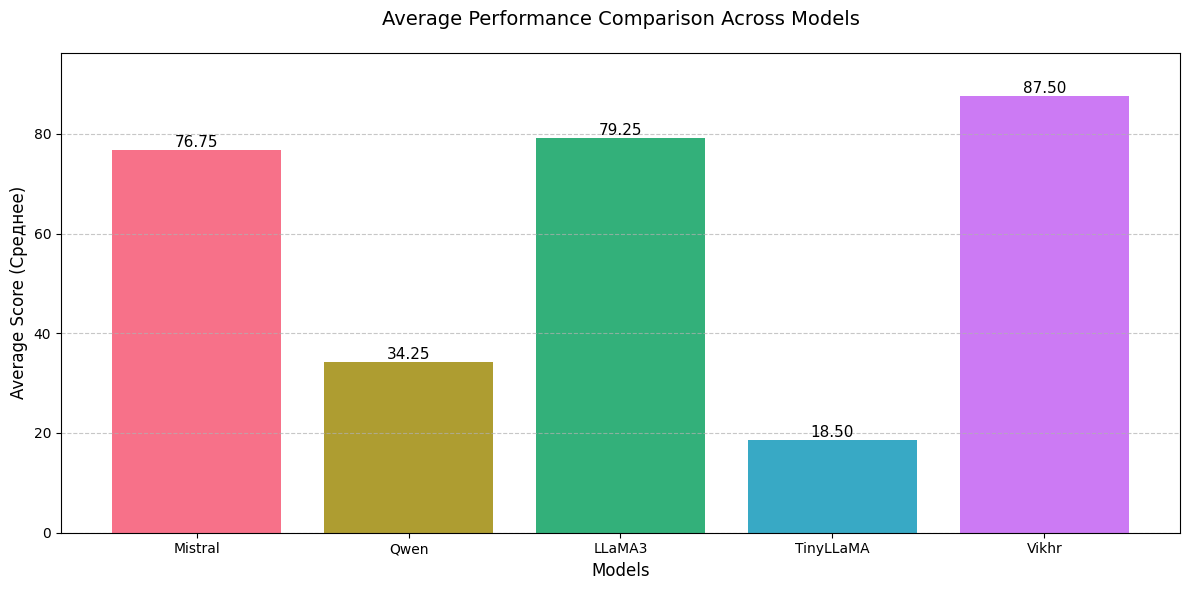

Релевантность 
Numeric values:
Mistral: 76.750
Qwen: 34.250
LLaMA3: 79.250
TinyLLaMA: 18.500
Vikhr: 87.500


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
mean_scores = {
    'Mistral': df_mistral['Релевантность'].mean(),
    'Qwen': df_qwen['Релевантность'].mean(),
    'LLaMA3': df_llama3['Релевантность'].mean(),
    'TinyLLaMA': df_tinyllama['Релевантность'].mean(),
    'Vikhr': df_vikhr['Релевантность'].mean()
}

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot with enhanced style
colors = sns.color_palette("husl", len(mean_scores))
bars = plt.bar(mean_scores.keys(), mean_scores.values(), color=colors)

# Customize the plot
plt.title('Average Performance Comparison Across Models', fontsize=14, pad=20)
plt.ylabel('Average Score (Среднее)', fontsize=12)
plt.xlabel('Models', fontsize=12)

plt.ylim(0, max(mean_scores.values()) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom',
             fontsize=11)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()

plt.show()

# Print actual values
print("Релевантность \nNumeric values:")
for model, score in mean_scores.items():
    print(f"{model}: {score:.3f}")

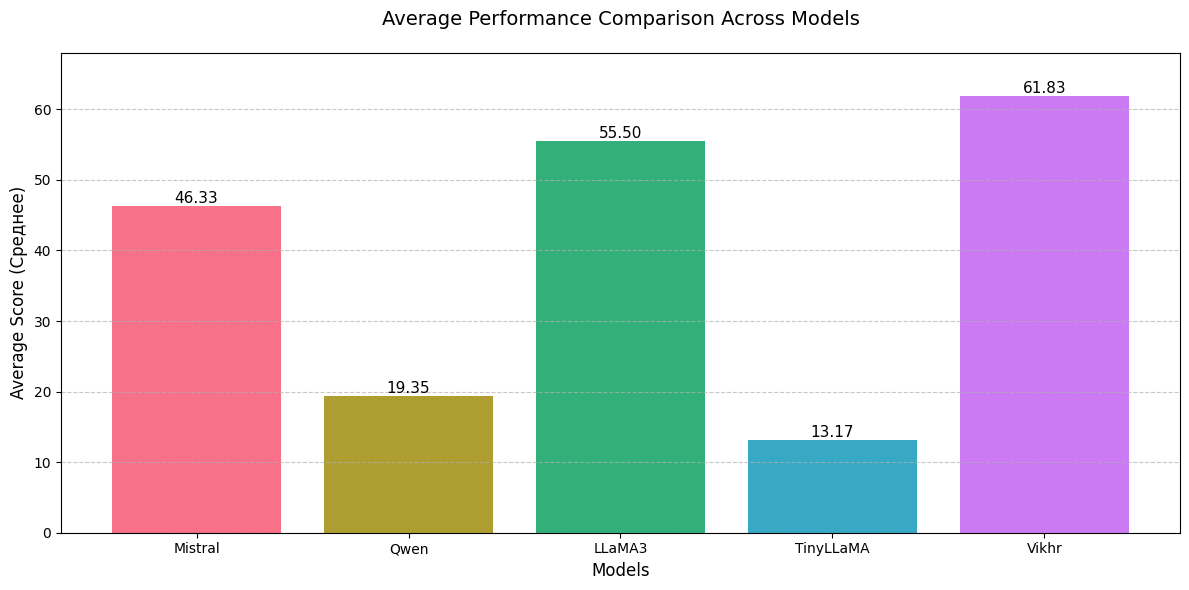


Numeric values:
Mistral: 46.333
Qwen: 19.350
LLaMA3: 55.500
TinyLLaMA: 13.167
Vikhr: 61.833


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
mean_scores = {
    'Mistral': df_mistral['Среднее'].mean(),
    'Qwen': df_qwen['Среднее'].mean(),
    'LLaMA3': df_llama3['Среднее'].mean(),
    'TinyLLaMA': df_tinyllama['Среднее'].mean(),
    'Vikhr': df_vikhr['Среднее'].mean()
}

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot with enhanced style
colors = sns.color_palette("husl", len(mean_scores))
bars = plt.bar(mean_scores.keys(), mean_scores.values(), color=colors)

# Customize the plot
plt.title('Average Performance Comparison Across Models', fontsize=14, pad=20)
plt.ylabel('Average Score (Среднее)', fontsize=12)
plt.xlabel('Models', fontsize=12)

plt.ylim(0, max(mean_scores.values()) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom',
             fontsize=11)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()

plt.show()

# Print actual values
print("\nNumeric values:")
for model, score in mean_scores.items():
    print(f"{model}: {score:.3f}")

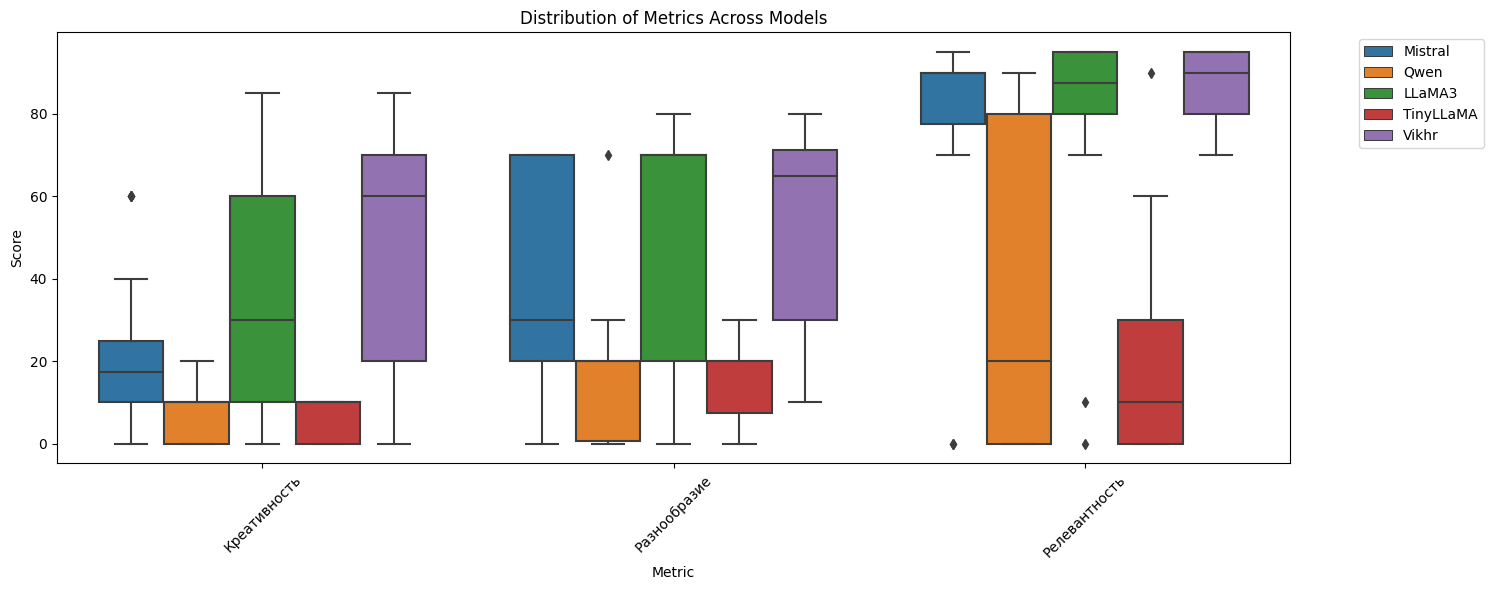

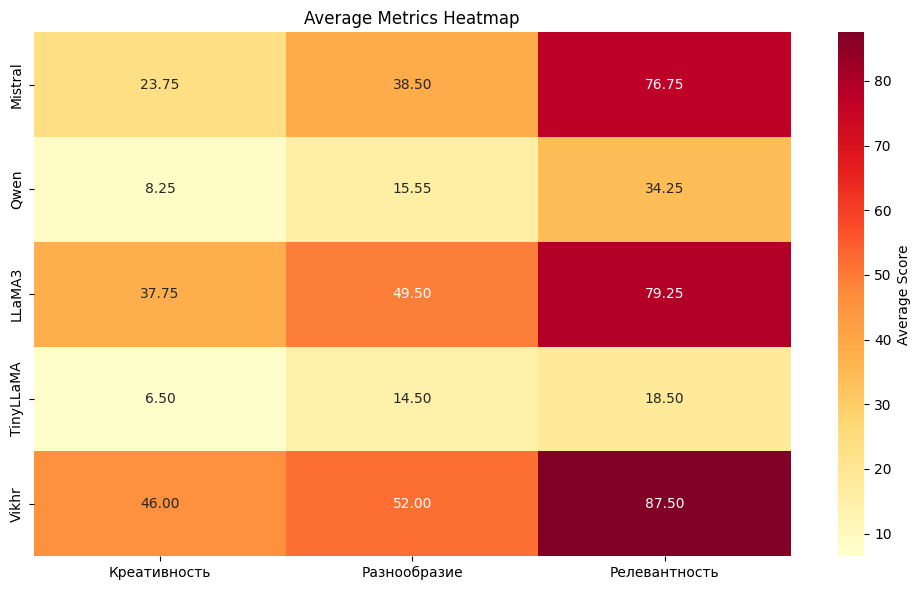

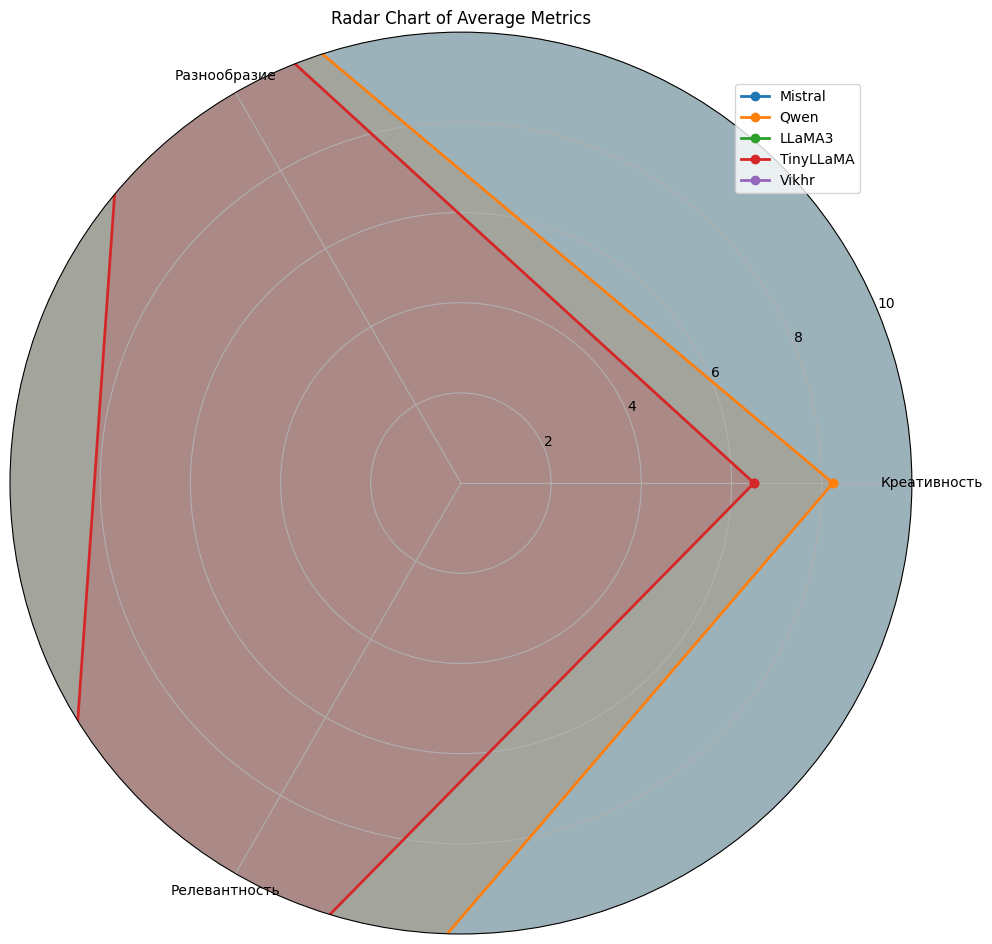

In [9]:
# Create detailed metrics comparison
metrics = ['Креативность', 'Разнообразие', 'Релевантность']
model_dfs = {
    'Mistral': df_mistral,
    'Qwen': df_qwen,
    'LLaMA3': df_llama3,
    'TinyLLaMA': df_tinyllama,
    'Vikhr': df_vikhr
}

# Calculate statistics for each metric and model
stats_data = []
for model_name, df in model_dfs.items():
    for metric in metrics:
        stats_data.append({
            'Model': model_name,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Max': df[metric].max(),
            'Min': df[metric].min(),
            'Std': df[metric].std()
        })

# Create box plots for detailed distribution
plt.figure(figsize=(15, 6))
data_melted = pd.concat([
    pd.melt(df[metrics], value_vars=metrics).assign(Model=name)
    for name, df in model_dfs.items()
])

sns.boxplot(x='variable', y='value', hue='Model', data=data_melted)
plt.title('Distribution of Metrics Across Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create heatmap of average metrics
avg_metrics = pd.DataFrame([
    [df[metric].mean() for metric in metrics]
    for df in model_dfs.values()
], columns=metrics, index=model_dfs.keys())

plt.figure(figsize=(10, 6))
sns.heatmap(avg_metrics, annot=True, cmap='YlOrRd', fmt='.2f', 
            cbar_kws={'label': 'Average Score'})
plt.title('Average Metrics Heatmap')
plt.tight_layout()
plt.show()

# Radar chart for comparing all metrics
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
for model_name, df in model_dfs.items():
    values = [df[metric].mean() for metric in metrics]
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 10)
plt.legend(bbox_to_anchor=(0.95, 0.95))
plt.title('Radar Chart of Average Metrics')
plt.tight_layout()
plt.show()

In [10]:
df_mistral['act'].head(20)

0                    Password Generator
1                            Journalist
2                          Essay Writer
3               Social Media Influencer
4                                Socrat
5                         Tech Reviewer
6       Emergency Response Professional
7                          Ascii Artist
8                           Tech Writer
9                 Public Speaking Coach
10            Text Based Adventure Game
11                 Motivational Speaker
12                               Rapper
13                                 Poet
14                             Novelist
15                         Movie Critic
16    Speech-Language Pathologist (SLP)
17                            IT Expert
18                    Stand-up Comedian
19                         Travel Guide
Name: act, dtype: object

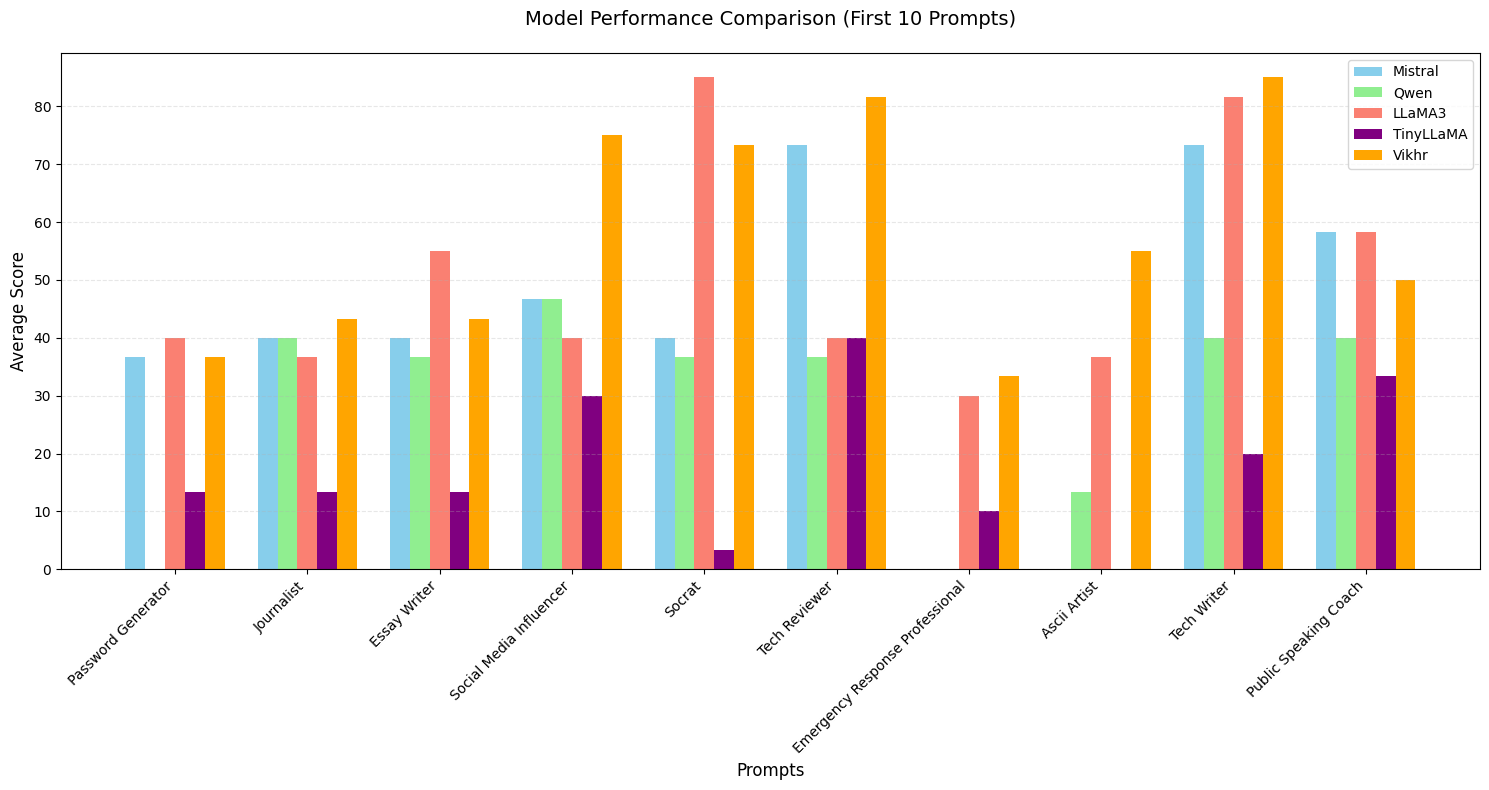

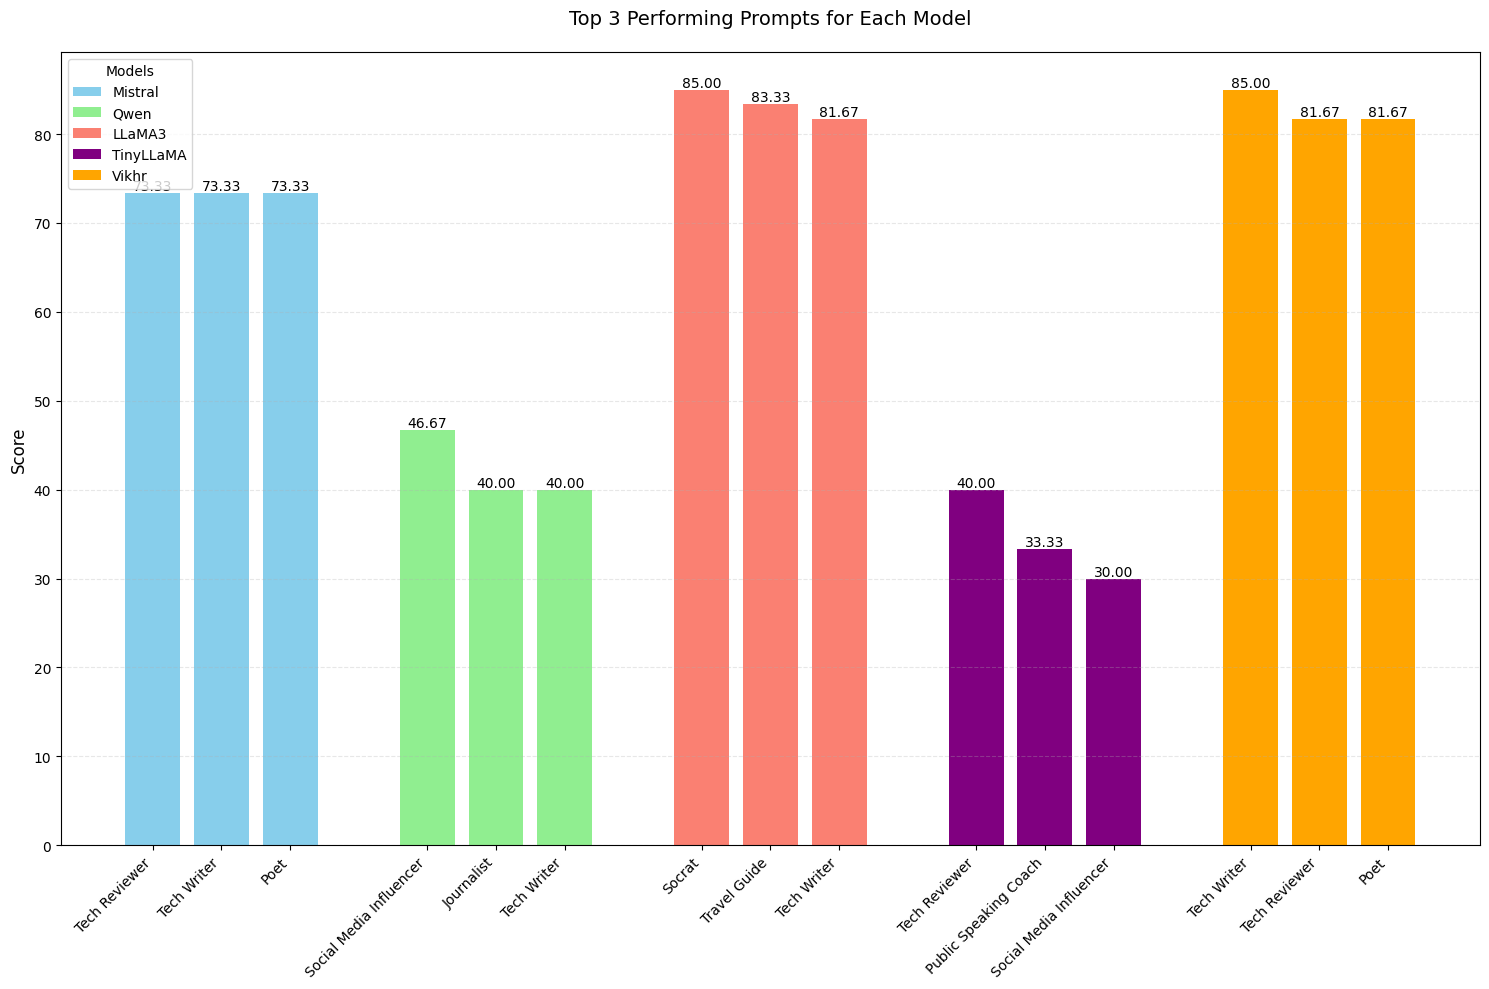


Top 3 prompts for each model:

Mistral:
       Prompt   Mistral
Tech Reviewer 73.333333
  Tech Writer 73.333333
         Poet 73.333333

Qwen:
                 Prompt      Qwen
Social Media Influencer 46.666667
             Journalist 40.000000
            Tech Writer 40.000000

LLaMA3:
      Prompt    LLaMA3
      Socrat 85.000000
Travel Guide 83.333333
 Tech Writer 81.666667

TinyLLaMA:
                 Prompt  TinyLLaMA
          Tech Reviewer  40.000000
  Public Speaking Coach  33.333333
Social Media Influencer  30.000000

Vikhr:
       Prompt     Vikhr
  Tech Writer 85.000000
Tech Reviewer 81.666667
         Poet 81.666667


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create DataFrame for first 10 prompts
comparison_df = pd.DataFrame({
    'Prompt': df_mistral['act'][:10],
    'Mistral': df_mistral['Среднее'][:10],
    'Qwen': df_qwen['Среднее'][:10],
    'LLaMA3': df_llama3['Среднее'][:10],
    'TinyLLaMA': df_tinyllama['Среднее'][:10],
    'Vikhr': df_vikhr['Среднее'][:10]
})

# First plot: First 10 prompts comparison
plt.figure(figsize=(15, 8))

x = np.arange(len(comparison_df['Prompt']))
width = 0.15

plt.bar(x - width*2, comparison_df['Mistral'], width, label='Mistral', color='skyblue')
plt.bar(x - width, comparison_df['Qwen'], width, label='Qwen', color='lightgreen')
plt.bar(x, comparison_df['LLaMA3'], width, label='LLaMA3', color='salmon')
plt.bar(x + width, comparison_df['TinyLLaMA'], width, label='TinyLLaMA', color='purple')
plt.bar(x + width*2, comparison_df['Vikhr'], width, label='Vikhr', color='orange')

plt.xlabel('Prompts', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('Model Performance Comparison (First 10 Prompts)', fontsize=14, pad=20)
plt.xticks(x, comparison_df['Prompt'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Create full DataFrame for top 3 analysis
full_comparison_df = pd.DataFrame({
    'Prompt': df_mistral['act'],
    'Mistral': df_mistral['Среднее'],
    'Qwen': df_qwen['Среднее'],
    'LLaMA3': df_llama3['Среднее'],
    'TinyLLaMA': df_tinyllama['Среднее'],
    'Vikhr': df_vikhr['Среднее']
})

# Create visualization for top 3 performers
plt.figure(figsize=(15, 10))

# Initialize position counters
pos = 0
bar_positions = []
bar_labels = []
bar_heights = []
bar_colors = []
model_colors = {'Mistral': 'skyblue', 'Qwen': 'lightgreen', 'LLaMA3': 'salmon', 
                'TinyLLaMA': 'purple', 'Vikhr': 'orange'}

for model in ['Mistral', 'Qwen', 'LLaMA3', 'TinyLLaMA', 'Vikhr']:
    top_3 = full_comparison_df.nlargest(3, model)[['Prompt', model]]
    
    # Add bars for this model
    for idx, row in top_3.iterrows():
        bar_positions.append(pos)
        bar_labels.append(f"{row['Prompt']}")
        bar_heights.append(row[model])
        bar_colors.append(model_colors[model])
        pos += 1
    pos += 1  # Add space between models

# Create the bars
bars = plt.bar(bar_positions, bar_heights, color=bar_colors)

# Customize the plot
plt.xticks(bar_positions, bar_labels, rotation=45, ha='right')
plt.ylabel('Score', fontsize=12)
plt.title('Top 3 Performing Prompts for Each Model', fontsize=14, pad=20)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Create custom legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model) 
                  for model, color in model_colors.items()]
plt.legend(handles=legend_elements, title='Models')

plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the numerical values
print("\nTop 3 prompts for each model:")
for model in ['Mistral', 'Qwen', 'LLaMA3', 'TinyLLaMA', 'Vikhr']:
    print(f"\n{model}:")
    top_3 = full_comparison_df.nlargest(3, model)[['Prompt', model]]
    print(top_3.to_string(index=False))